In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict

In [2]:
load_dotenv()

True

In [3]:
llm = ChatGroq(model="llama-3.1-8b-instant")

In [4]:
import time

In [5]:
class CrashState(TypedDict):
    input:str
    step1:str
    step2:str
    step3:str

In [6]:
def step1(state:CrashState):
    print("step 1 executed")
    return {"step1":"done","input":state["input"]}

def step2(state: CrashState):
    print("step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(30)
    return {"step2":"done"}

def step3(state:CrashState):
    print("step 3 executed")
    return {"step3":"done"}

In [7]:
graph = StateGraph(CrashState)
graph.add_node("step1",step1)
graph.add_node("step2",step2)
graph.add_node("step3",step3)

graph.add_edge(START, "step1")
graph.add_edge("step1", "step2")
graph.add_edge("step2","step3")
graph.add_edge("step3", END)

checkpointer = InMemorySaver()
workflow=graph.compile(checkpointer=checkpointer)

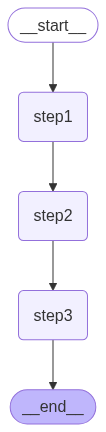

In [8]:
workflow

In [9]:
try:
    print("Ruuning graph: Please manually interrupt during step2...")
    workflow.invoke({"input":"start"}, config={"configurable":{"thread_id":"1"}})
except KeyboardInterrupt:
    print("Kernel manually interrupted (crash simulated).")

Ruuning graph: Please manually interrupt during step2...
step 1 executed
step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
Kernel manually interrupted (crash simulated).


In [10]:
workflow.get_state({"configurable":{"thread_id":"1"}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f070982-9b72-67a8-8001-e9ab33eb61bb'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T18:32:08.569437+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f070982-9b70-60c3-8000-3f0057d2ac1f'}}, tasks=(PregelTask(id='0838f53e-8a26-25c9-b505-79234bc0389e', name='step2', path=('__pregel_pull', 'step2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [11]:
list(workflow.get_state_history({"configurable":{"thread_id":"1"}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step2',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f070982-9b72-67a8-8001-e9ab33eb61bb'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T18:32:08.569437+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f070982-9b70-60c3-8000-3f0057d2ac1f'}}, tasks=(PregelTask(id='0838f53e-8a26-25c9-b505-79234bc0389e', name='step2', path=('__pregel_pull', 'step2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step1',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f070982-9b70-60c3-8000-3f0057d2ac1f'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T18:32:08.568441+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '',

In [12]:
final_state=workflow.invoke(None, {"configurable":{"thread_id":"1"}})
print("\n Final state:", final_state)

step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
step 3 executed

 Final state: {'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}


In [13]:
workflow.get_state({"configurable":{"thread_id":"1"}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07098a-7d99-662d-8003-a1a81332b069'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T18:35:40.188010+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07098a-7d94-6a33-8002-99f19b1bbbfa'}}, tasks=(), interrupts=())

In [14]:
list(workflow.get_state_history({"configurable":{"thread_id":"1"}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07098a-7d99-662d-8003-a1a81332b069'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T18:35:40.188010+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07098a-7d94-6a33-8002-99f19b1bbbfa'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step3',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07098a-7d94-6a33-8002-99f19b1bbbfa'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}, 'thread_id': '1'}, created_at='2025-08-03T18:35:40.186065+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f070982-9b72-67a8-8001-e9ab33eb61bb'}}, tasks=(PregelTask(id='4388aeb4-e6